In [1]:
import sqlite3
import pandas as pd
data = pd.read_csv('diseases.csv')
data

,region,diseases,2012,2013,2014,2015,2016
0,Республика Беларусь,Сифилис (все формы),4988,4472,4013,3545,2822
1,Республика Беларусь,Гонококковая инфекция,750,575,522,511,424
2,Республика Беларусь,Злокачественные новообразования,245505,249903,257680,268511,278933
3,Республика Беларусь,Психические расстройства,103349,105852,107039,107681,108195
4,Республика Беларусь,Наркомания и токсикомания,12228,12382,11816,11772,11338
5,Республика Беларусь,Активный туберкулез,10390,9013,7864,6859,5752
6,Республика Беларусь,Алкоголизм и алкогольные психозы,193450,190609,188260,184253,179565
7,Брестская область,Сифилис (все формы),310,267,236,201,154
8,Брестская область,Гонококковая инфекция,89,72,45,72,36
9,Брестская область,Злокачественные новообразования,30862,31821,33082,34902,36191


In [2]:
conn = sqlite3.connect('diseasesRB.db')
cursor = conn.cursor()

In [3]:
cursor.execute('''CREATE TABLE IF NOT EXISTS diseasesRB (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    region TEXT,
    diseases TEXT,
    year2012 INTEGER,
    year2013 INTEGER,
    year2014 INTEGER,
    year2015 INTEGER,
    year2016 INTEGER
)''')
conn.commit()

In [4]:
df = [tuple(x) for x in data.to_numpy()]
cursor.executemany('''
INSERT INTO diseasesRB (region, diseases, year2012, year2013, year2014, year2015, year2016)
VALUES (?, ?, ?, ?, ?, ?, ?)
''', df)
conn.commit()

In [5]:
cursor.execute("SELECT * FROM diseasesRB")
diseasesRB = cursor.fetchall()
for disease in diseasesRB:
    print(disease)
conn.commit()

(1, 'Республика Беларусь', 'Сифилис (все формы)', 4988, 4472, 4013, 3545, 2822)
(2, 'Республика Беларусь', 'Гонококковая инфекция', 750, 575, 522, 511, 424)
(3, 'Республика Беларусь', 'Злокачественные новообразования', 245505, 249903, 257680, 268511, 278933)
(4, 'Республика Беларусь', 'Психические расстройства', 103349, 105852, 107039, 107681, 108195)
(5, 'Республика Беларусь', 'Наркомания и токсикомания', 12228, 12382, 11816, 11772, 11338)
(6, 'Республика Беларусь', 'Активный туберкулез', 10390, 9013, 7864, 6859, 5752)
(7, 'Республика Беларусь', 'Алкоголизм и алкогольные психозы', 193450, 190609, 188260, 184253, 179565)
(8, 'Брестская область', 'Сифилис (все формы)', 310, 267, 236, 201, 154)
(9, 'Брестская область', 'Гонококковая инфекция', 89, 72, 45, 72, 36)
(10, 'Брестская область', 'Злокачественные новообразования', 30862, 31821, 33082, 34902, 36191)
(11, 'Брестская область', 'Психические расстройства', 15065, 14807, 15505, 15264, 16887)
(12, 'Брестская область', 'Наркомания и ток

In [6]:
cursor.execute("SELECT diseases, year2013 FROM diseasesRB WHERE region = 'г. Минск'")
diseasesRB = cursor.fetchall()
for disease in diseasesRB:
    print(disease)
conn.commit()

('Сифилис (все формы)', 570)
('Гонококковая инфекция', 142)
('Злокачественные новообразования', 52310)
('Психические расстройства', 19148)
('Наркомания и токсикомания', 5068)
('Активный туберкулез', 1111)
('Алкоголизм и алкогольные психозы', 28008)


In [7]:
cursor.execute('''
SELECT SUM(year2015) FROM diseasesRB WHERE  region = 'Республика Беларусь'
''')
result = cursor.fetchone()
print(result)
conn.commit()

(583132,)


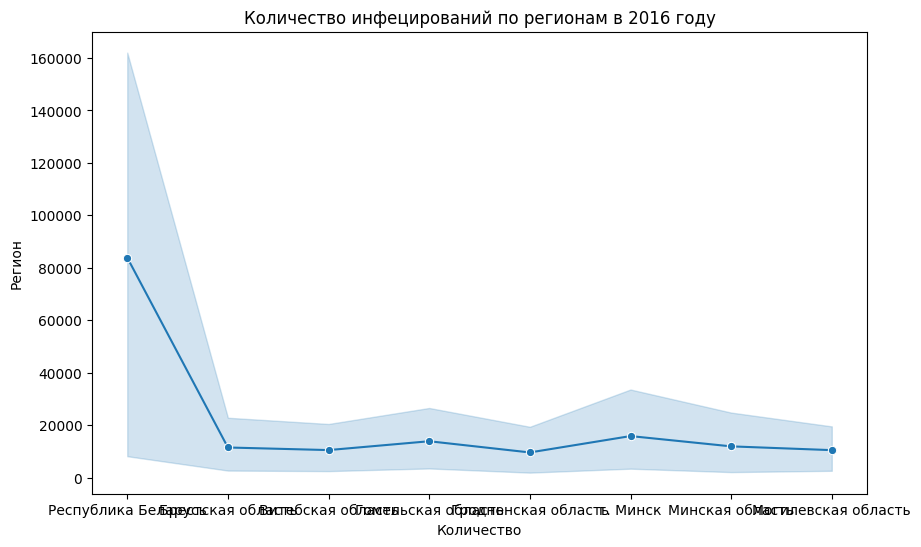

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='region', y='2016', marker='o')
plt.title('Количество инфецирований по регионам в 2016 году')
plt.xlabel('Количество')
plt.ylabel('Регион')
plt.show()